### Query from waterbox bucket

In [7]:
import influxdb_client, os, time
from datetime import datetime, timedelta, timezone
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

token = "fP-GBq8Z1wZE7iW8qFBuxVy-ArVP9TqVec0naJ77XLECiwSr82aRXqvo3ylXZqU_2ad2vxWGcMoMbl3PXqAZ7A=="
server_url = "http://140.112.12.62:8086"
client = InfluxDBClient(url=server_url, token=token)
query_api = client.query_api()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

query = 'from(bucket: "WaterBox")\
    |> range(start: -30d)\
    |> filter(fn:(r) => r.device_id == "9C65F9448BD3")\
    |> drop(columns: ["_start", "_stop"])'

result = query_api.query(org="NTUCE", query = query)
## Return type of query_api.query is a TableList object

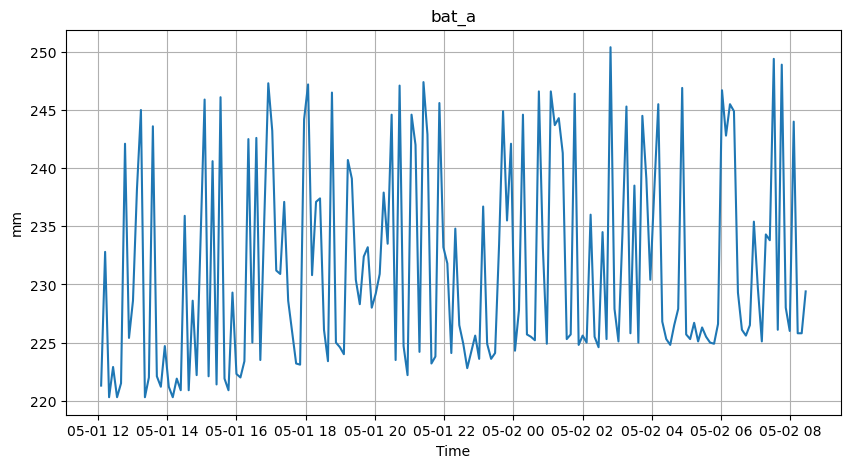

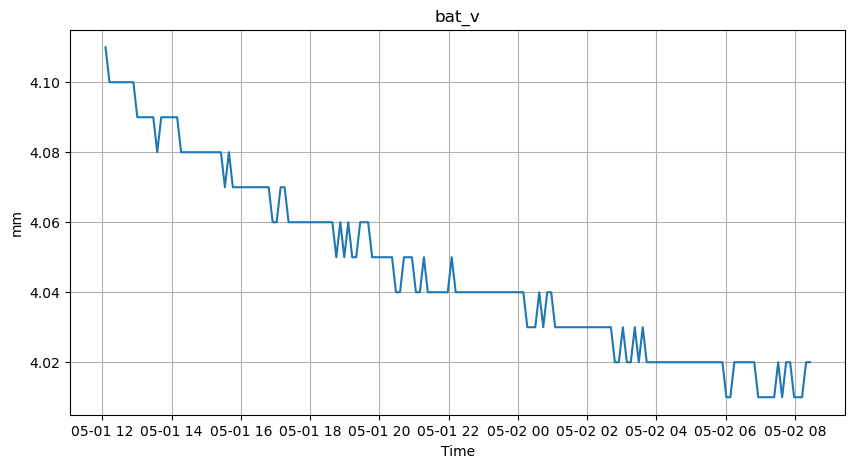

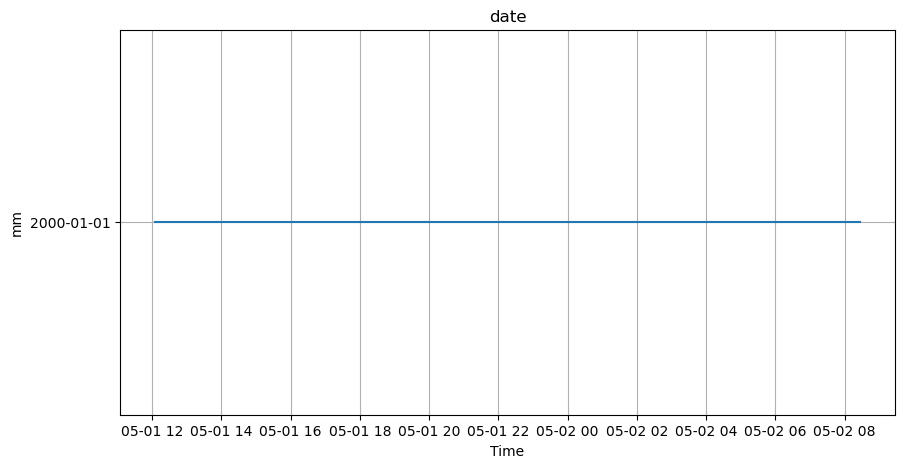

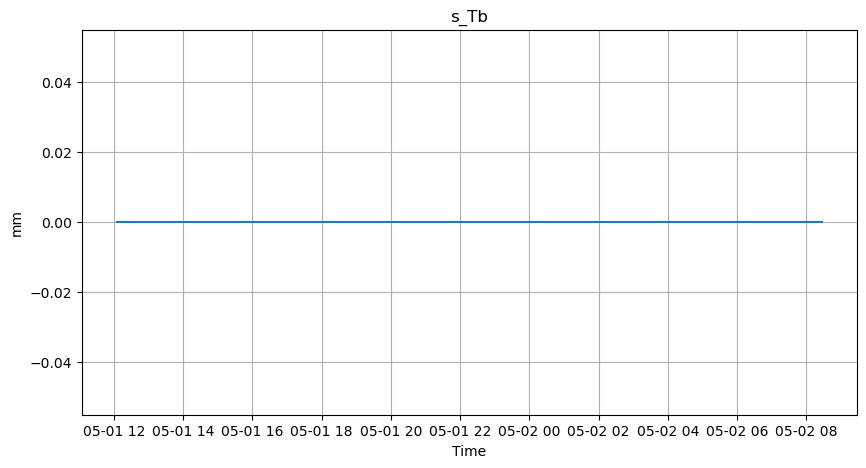

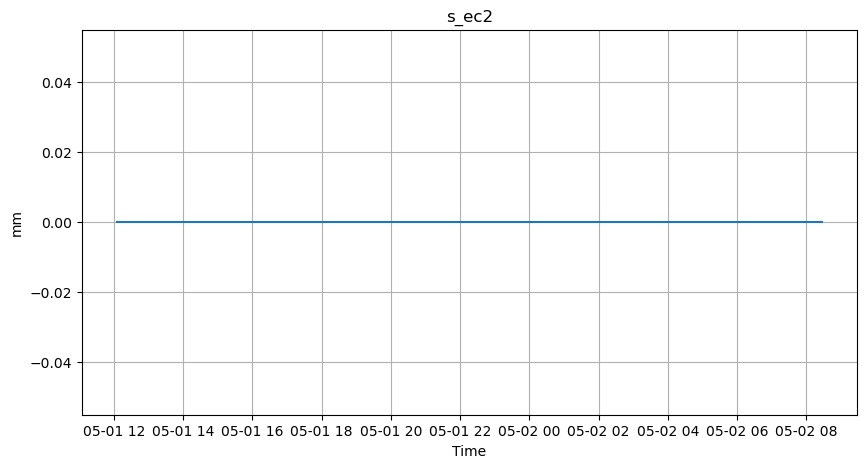

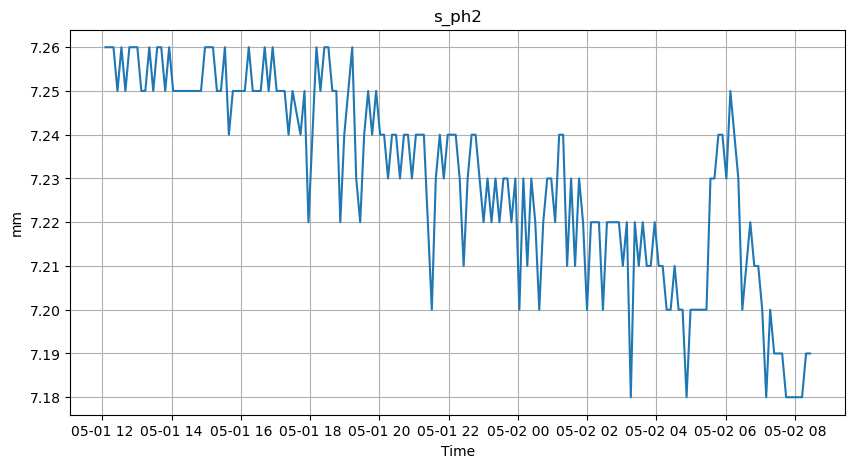

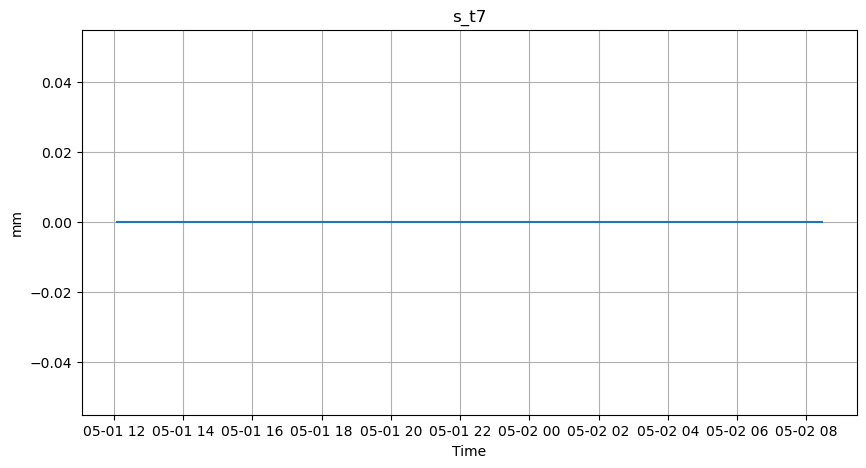

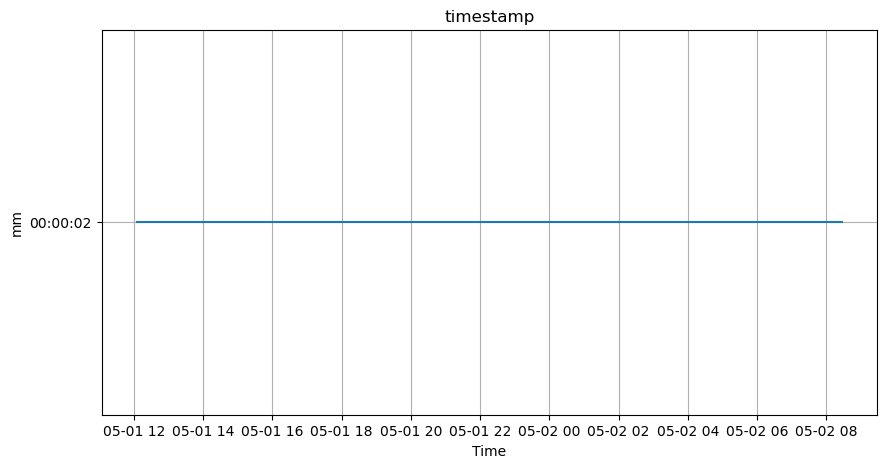

In [14]:
for table in result:
    field_name = table.records[0].values['_field']
    data = [data.values['_value'] for data in table.records]
    time = [data.values['_time'] for data in table.records]

    plt.figure(figsize=(10,5))
    plt.title(field_name)
    plt.xlabel("Time")
    plt.ylabel("mm")
    plt.grid(True)
    plt.plot(time, data, label=field_name)

